In [2]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from lifetimes.utils import summary_data_from_transaction_data
from lifetimes import BetaGeoFitter
from scipy.stats import poisson


## Data Enrichment

In [5]:
#python lifetimes function converting the login dates into RFT table
rft_df = summary_data_from_transaction_data(raw_login_data, 'cust', 'date')
rft_df.head()

,frequency,recency,T
cust,,,
2,0.0,0.0,169.0
6,0.0,0.0,85.0
10,0.0,0.0,54.0
24,0.0,0.0,31.0
35,0.0,0.0,120.0


## Model Fitting:  

#### BG/NBD model

In [6]:
bgf = BetaGeoFitter(penalizer_coef=0.0)

In [7]:
bgf.fit(rft_df['frequency'], rft_df['recency'], rft_df['T'])

<lifetimes.BetaGeoFitter: fitted with 49458 subjects, a: 1.77, alpha: 12.21, b: 4.46, r: 0.28>

Parameter Interpretation:
* <b>p (=probability of our customer to become inactive)</b>  follows a <b>Beta distribution</b> with <b>a = 1.80</b> and <b>b = 4.67</b> <br></br>
* <b>alpha</b> and <b>r</b> are for the <b>Gamma distribution</b> (=heterogeneity in login rates among customers)

## Customer Analysis

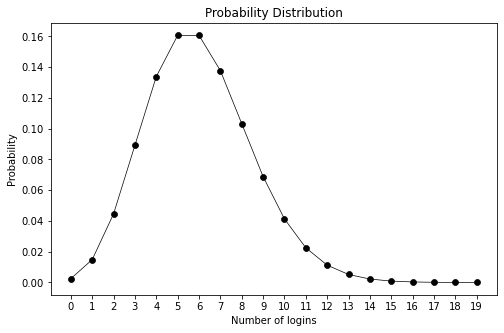

In [38]:
#example with lambda=6 (should be derived via calculation)
def create_probability_distribution(l,n, unit=''):
    prob_list = []
    distribution = poisson(l)
    for i in range(0,n):
        prob_list.append(distribution.pmf(i))
        
    plt.figure(figsize=(8,5))
    plt.ylabel('Probability')
    plt.xlabel(f'Number of {unit}')
    plt.xticks(range(0, n))
    plt.title('Probability Distribution')
    plt.plot(prob_list, color='black', linewidth=0.7, zorder=1)
    plt.scatter(range(0, n), prob_list, color='black', edgecolor='black', linewidth=0.7, zorder=2)
    plt.show()


create_probability_distribution(6, 20, 'logins')


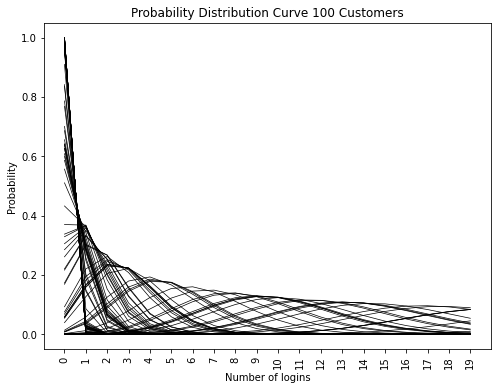

In [41]:
def customer_probability(n_cust, n_trx, r, alpha, unit=''):
    plt.figure(figsize=(8,6))
    
    for i in range(0, n_cust):
        distribution = poisson(np.random.gamma(shape=r, scale=alpha))
        prob_list = []
        for x in range(0,n_trx):
            prob_list.append(distribution.pmf(x))
        plt.plot(prob_list, color='black', linewidth=0.7, zorder=1)
    plt.ylabel('Probability')
    plt.xlabel(f'Number of {unit}')
    plt.xticks(range(0, n_trx), rotation=90)
    plt.title(f'Probability Distribution Curve {n_cust} Customers')
    plt.show()
    
customer_probability(100, 20, 0.28, 12.21, 'logins')

### adding drop-off probability:

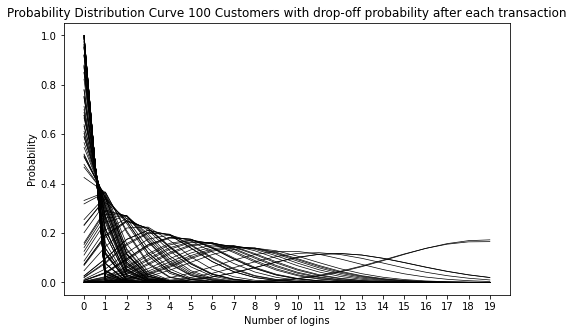

In [43]:
def customer_probability_with_dropoff(n_cust, n_trx, r, alpha, a, b, unit=''):
    plt.figure(figsize=(8,5))
    for customer in range(0, n_cust):
        distribution = poisson(np.random.gamma(shape=r, scale=alpha))
        prob_list = []
        beta = np.random.beta(a=a, b=b)
        cumulative_beta = 0
        for x in range(0,n_trx):
            proba = distribution.pmf(x)
            cumulative_beta = beta + cumulative_beta - (beta * cumulative_beta)
            inactive_probability = 1 - cumulative_beta
            proba *= inactive_probability
            prob_list.append(proba)
        prob_list = np.array(prob_list)
        prob_list /= prob_list.sum()
        plt.plot(prob_list, color='black', linewidth=0.7, zorder=1)
        
    plt.ylabel('Probability')
    plt.xlabel(f'Number of {unit}')
    plt.xticks(range(0, n_trx))
    plt.title(f'Probability Distribution Curve {n_cust} Customers with drop-off probability after each transaction')
    plt.show()



        
customer_probability_with_dropoff(100,20,0.28, 12.21, 1.77, 4.46, 'logins')